In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import pandas as pd

In [3]:
def show_img(img, title= ''):
    plt.imshow(cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE))
    plt.title(title);

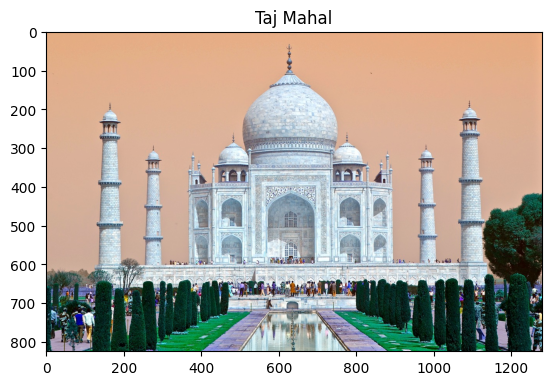

In [4]:
img1 = cv2.imread("tajMahal.jpg")
show_img(img1, 'Taj Mahal')

In [5]:
img1.shape

(825, 1280, 3)

In [6]:
shape = img1.shape

### Uniform Noise

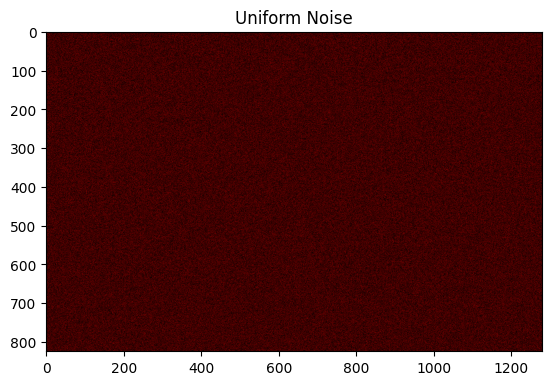

In [7]:
uniform_noise = np.zeros(shape, dtype = np.uint8)
cv2.randu(uniform_noise, 0, 255)
uniform_noise = (uniform_noise*0.5).astype(np.uint8)

uniform_noise_img = cv2.add(img1, uniform_noise)

show_img(uniform_noise, "Uniform Noise")

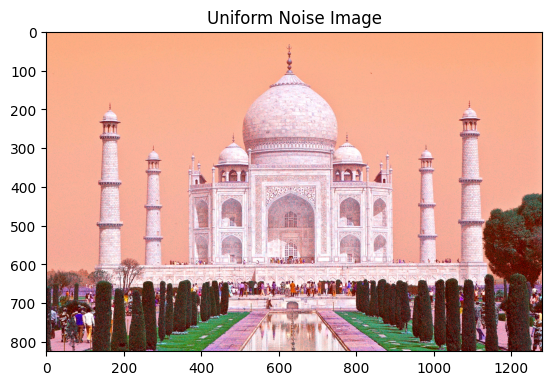

In [8]:
show_img(uniform_noise_img, "Uniform Noise Image")

### Gassian Noise

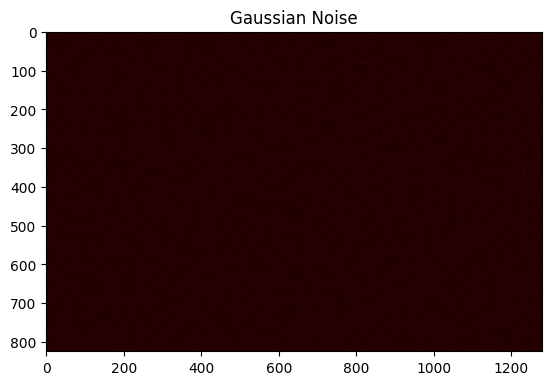

In [9]:
gaussian_noise = np.zeros(shape, dtype = np.uint8)

# mean - 128, std dev - 20
cv2.randu(gaussian_noise, 128, 20)
gaussian_noise = (gaussian_noise*0.5).astype(np.uint8)

gaussian_noise_img = cv2.add(img1, gaussian_noise)

show_img(gaussian_noise, "Gaussian Noise")

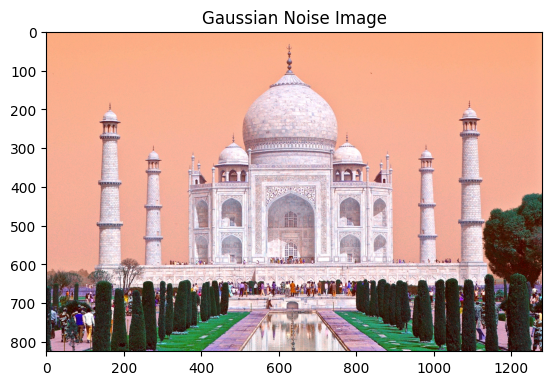

In [10]:
show_img(gaussian_noise_img, "Gaussian Noise Image")

### Salt and Pepper Noise

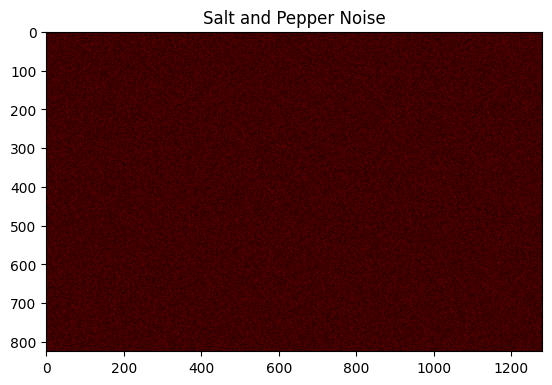

In [11]:
sp_noise = np.zeros(shape, dtype = np.uint8)

cv2.randu(sp_noise, 0, 255)
sp_noise = (sp_noise*0.5).astype(np.uint8)

sp_noise_img = cv2.add(img1, sp_noise)

show_img(sp_noise, "Salt and Pepper Noise")

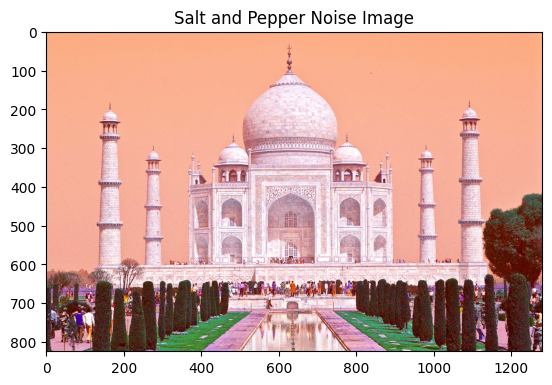

In [12]:
show_img(sp_noise_img, "Salt and Pepper Noise Image")

In [80]:
def show_bw_img(img, title= ''):
    img = cv2.convertScaleAbs(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),cmap='gray')
    plt.title(title)

In [81]:
def pixel_values_sum(img):
    pixel_sum = 0
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(3):
                pixel_sum += img[i][j][c]
                
    return pixel_sum

In [82]:
print(f"Sum of pixel values before smoothing : {pixel_values_sum(img1)}\n\
Sum of pixel values after adding Uniform Noise : {pixel_values_sum(uniform_noise_img)}\n\
Sum of pixel values after adding Gaussian Noise : {pixel_values_sum(gaussian_noise_img)}\n\
Sum of pixel values after adding Salt and Pepper Noise : {pixel_values_sum(sp_noise_img)}\n")

Sum of pixel values before smoothing : 501092810
Sum of pixel values after adding Uniform Noise : 544598156
Sum of pixel values after adding Gaussian Noise : 533849579
Sum of pixel values after adding Salt and Pepper Noise : 544532325



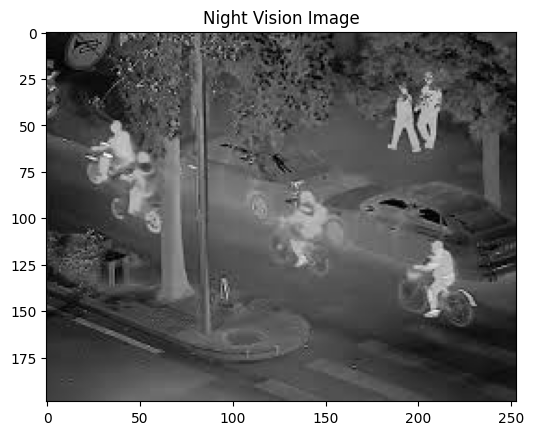

In [102]:
img2 = cv2.imread("NightVision.jpg")
img2 = cv2.convertScaleAbs(img2)
show_img(img2, "Night Vision Image")

In [103]:
img2.shape

(199, 253, 3)

In [104]:
print(img2[:,:,0].all() == img2[:,:,1].all())
print(img2[:,:,0].all() == img2[:,:,2].all())

True
True


In [105]:
img2 = img2[:,:,0]

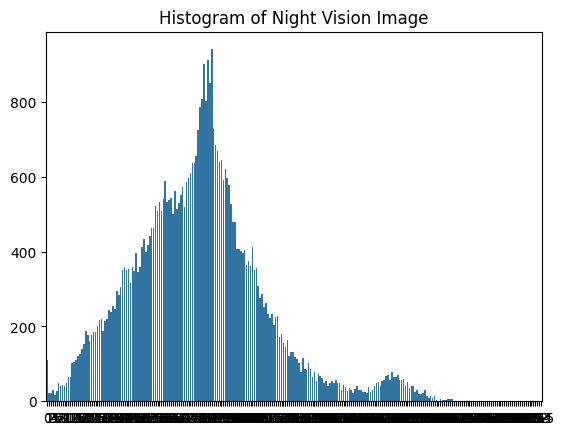

In [106]:
def get_histogram(image,title):
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i,j]] += 1
    sns.barplot(x=np.arange(256), y=histogram)
    plt.title(title);
    return histogram

histogram = get_histogram(img2, "Histogram of Night Vision Image")

In [107]:
data = pd.DataFrame()
data['pixel'] = [i for i in range(256)]
data['frequency'] = histogram
data['pdf'] = [histogram[i]/(img2.shape[0]*img2.shape[1]) for i in range(256)]
data['cdf'] = [sum(data['pdf'][:i+1]) for i in range(256)]
data['cdfx7'] = [255*data['cdf'][i] for i in range(256)]
data['new_pixel'] = [int(np.round(255*data['cdf'][i])) for i in range(256)] 
data.tail()

,pixel,frequency,pdf,cdf,cdfx7,new_pixel
251,251,0.0,0.00000,0.99996,254.98987,255
252,252,0.0,0.00000,0.99996,254.98987,255
253,253,2.0,0.00004,1.00000,255.00000,255
254,254,0.0,0.00000,1.00000,255.00000,255
255,255,0.0,0.00000,1.00000,255.00000,255


In [108]:
new_histogram = [0 for i in range(256)]
for i in range(256):
    new_histogram[data['new_pixel'][i]] += data['frequency'][i]
    

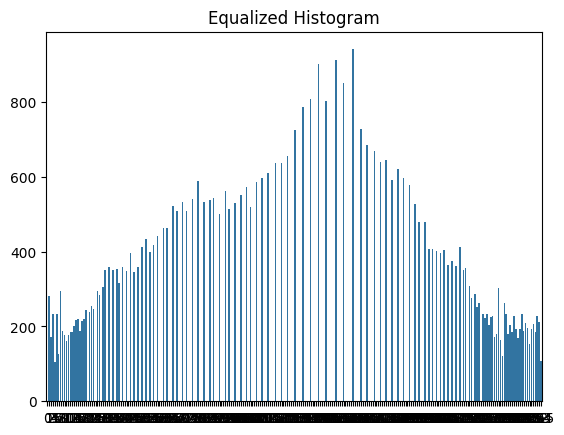

In [109]:
sns.barplot(x=np.arange(256), y= new_histogram)
plt.title("Equalized Histogram");

*Inference :* The pixel frequencies are more equally distributed

In [110]:
equalized_image = np.zeros((img2.shape[0],img2.shape[1],3))
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        for k in range(3):
            equalized_image[i,j,k] = int(data['new_pixel'][img2[i,j]])

equalized_image = cv2.convertScaleAbs(equalized_image)

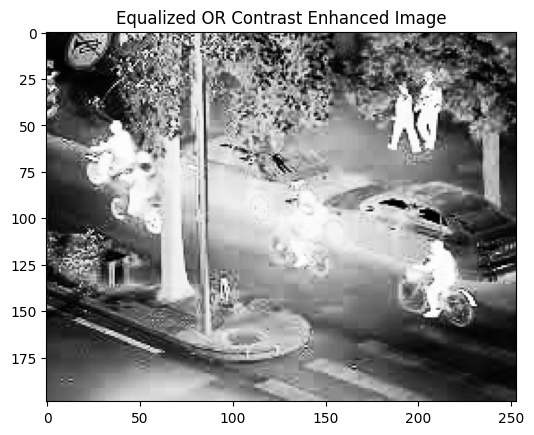

In [111]:
show_img(equalized_image, "Equalized OR Contrast Enhanced Image")

Text(0.5, 1.0, 'Contrast Enhanced Image')

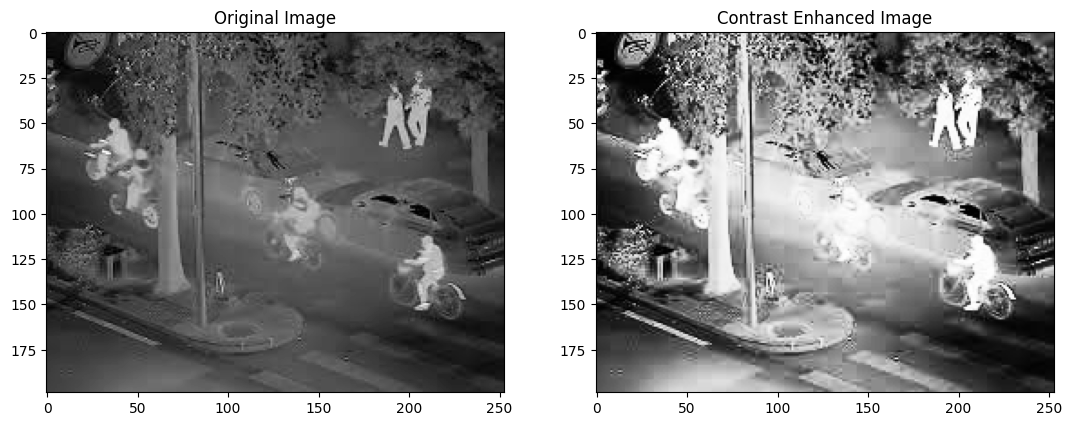

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7)) 

axs[0].imshow(img2,cmap = 'gray')
axs[0].set_title('Original Image')

axs[1].imshow(equalized_image)
axs[1].set_title('Contrast Enhanced Image')

In [120]:
original = pd.DataFrame()
original['pixel'] = [i for i in range(256)]
original['frequency'] = histogram
original['pdf'] = [histogram[i]/(img2.shape[0]*img2.shape[1]) for i in range(256)]
original['cdf'] = [sum(original['pdf'][:i+1]) for i in range(256)]
original['cdfx7'] = [255*original['cdf'][i] for i in range(256)]
original['new_pixel'] = [int(np.round(255*original['cdf'][i])) for i in range(256)]
original.head()

,pixel,frequency,pdf,cdf,cdfx7,new_pixel
0,0,111.0,0.002205,0.002205,0.562198,1
1,1,22.0,0.000437,0.002642,0.673625,1
2,2,23.0,0.000457,0.003098,0.790117,1
3,3,31.0,0.000616,0.003714,0.947127,1
4,4,18.0,0.000358,0.004072,1.038294,1


In [121]:
equalized = pd.DataFrame()
equalized['pixel'] = [i for i in range(256)]
equalized['frequency'] = new_histogram
equalized['pdf'] = [new_histogram[i]/(img2.shape[0]*img2.shape[1]) for i in range(256)]
equalized['cdf'] = [sum(equalized['pdf'][:i+1]) for i in range(256)]
equalized['cdfx7'] = [255*equalized['cdf'][i] for i in range(256)]
equalized['new_pixel'] = [int(np.round(255*equalized['cdf'][i])) for i in range(256)] 
equalized.head()

,pixel,frequency,pdf,cdf,cdfx7,new_pixel
0,0,0.0,0.000000,0.000000,0.000000,0
1,1,281.0,0.005581,0.005581,1.423223,1
2,2,171.0,0.003396,0.008978,2.289312,2
3,3,232.0,0.004608,0.013586,3.464357,3
4,4,104.0,0.002066,0.015651,3.991102,4


In [136]:
matching = pd.DataFrame()
matching['pixel'] = equalized['pixel']
matching['hist_eq'] = equalized['new_pixel']
matching['hist_org'] = original['new_pixel']

new_freqs = {i:0 for i in range(256)}
for k in new_freqs:
    new_freqs[equalized['new_pixel'][k]] += equalized['frequency'][k]

matching['new_freq'] = [new_freqs[matching['hist_org'][i]] for i in range(256)]

In [137]:
matching.head(10)

,pixel,hist_eq,hist_org,new_freq
0,0,0,1,281.0
1,1,1,1,281.0
2,2,2,1,281.0
3,3,3,1,281.0
4,4,4,1,281.0
5,5,5,1,281.0
6,6,6,1,281.0
7,7,7,2,171.0
8,8,8,2,171.0
9,9,9,2,171.0
